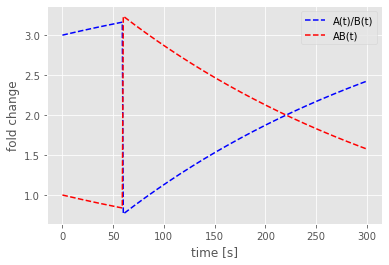

In [50]:
# First, install LMfit package using the following code:
# conda install -c conda-forge lmfit

from __future__ import division
import os
import sys
import glob
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

# initialize kinetic parameters
koff = 0.003
kon = 1

# function that returns dz/dt, a collection of 3 different ddRFP concentrations
def model(z,t,I):
    A = z[0]
    B = z[1]
    AB = z[2]
    dAdt = koff*AB - I*kon*A*B
    dBdt = koff*AB - I*kon*A*B
    dABdt = I*kon*A*B - koff*AB
    dzdt = [dAdt,dBdt,dABdt]
    return dzdt

# initial condition
z0 = [3,3,1]

# number of time points (301 for 300s, interval t = 1s)
n = 301

# time points
t = np.linspace(0,300,n)

# step-wise function input
I = np.zeros(n)
# change to 1 at time = 60s - 61s
I[60:61] = 1

# store solution
A = np.empty_like(t)
B = np.empty_like(t)
AB = np.empty_like(t)

# record initial conditions
A[0] = z0[0]
B[0] = z0[1]
AB[0] = z0[2]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(I[i],))
    # store solution for plotting
    A[i] = z[1][0]
    B[i] = z[1][1]
    AB[i] = z[1][2]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,A,'b--',label='A(t)/B(t)')
plt.plot(t,AB,'r--',label='AB(t)')
plt.ylabel('fold change')
plt.xlabel('time [s]')
plt.legend(loc='best')
plt.show()

In [46]:
data = pd.read_csv("y.csv") 
# Preview the first 5 lines of the loaded data 
data.head(65)

,y_ave
0,1.000000
1,1.001597
2,1.003194
3,1.004791
4,1.006388
...,...
60,1.024357
61,2.124863
62,3.225370
63,3.335885


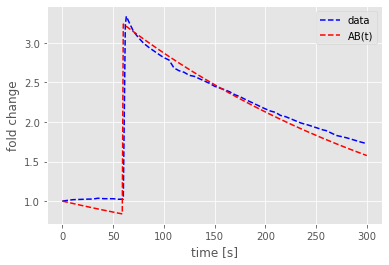

In [51]:
plt.plot(t,data,'b--',label='data')
plt.plot(t,AB,'r--',label='AB(t)')
plt.ylabel('fold change')
plt.xlabel('time [s]')
plt.legend(loc='best')
plt.show()